In [8]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
df2 = pd.read_csv("Death_rates_for_suicide__by_sex__race__Hispanic_origin__and_age__United_States.csv")
df2.columns = df2.columns.str.strip()
print("Data Count: \n")
print(df2.count())
print("Data Overview: \n")
print(df2.head())
print(df2['STUB_LABEL'].unique())

Data Count: 

INDICATOR         6390
UNIT              6390
UNIT_NUM          6390
STUB_NAME         6390
STUB_NAME_NUM     6390
STUB_LABEL        6390
STUB_LABEL_NUM    6390
YEAR              6390
YEAR_NUM          6390
AGE               6390
AGE_NUM           6390
ESTIMATE          5484
FLAG               906
dtype: int64
Data Overview: 

                 INDICATOR                                               UNIT  \
0  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
1  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
2  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
3  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   
4  Death rates for suicide  Deaths per 100,000 resident population, age-ad...   

   UNIT_NUM STUB_NAME  STUB_NAME_NUM   STUB_LABEL  STUB_LABEL_NUM  YEAR  \
0         1     Total              0  All persons             0.0  1950   
1         1     Tota

In [2]:
df2 = df2.rename(columns={
    "AGE": "age",
    "YEAR": "year",
    "ESTIMATE": "suicides/100k pop"
})

In [3]:
df2['sex'] = np.nan
mask = ~df2["STUB_NAME_NUM"].isin([0, 1])
df2.loc[mask & df2["STUB_LABEL"].str.startswith("Male"), "sex"] = "male"
df2.loc[mask & df2["STUB_LABEL"].str.startswith("Female"), "sex"] = "female"

In [4]:
#Split column
mask = ~df2["STUB_NAME_NUM"].isin([0, 1, 2, 3, 6, 7, 10, 11])
df2["race"] = np.nan
df2.loc[mask, "race"] = df2.loc[mask, "STUB_LABEL"].str.extract(r":\s*([^:]+)")[0].str.strip()
print(df2["race"].unique())

[nan 'White' 'Black or African American'
 'American Indian or Alaska Native' 'Asian or Pacific Islander']


In [5]:
#Split column
mask = ~df2["STUB_NAME_NUM"].isin([0, 1, 2, 3, 4, 5, 8, 9])
df2.loc[mask, "race"] = df2.loc[mask, "STUB_LABEL"].str.extract(r":\s*[^:]+:\s*([^:]+)")[0].str.strip()
print(df2["race"].unique())

[nan 'White' 'Black or African American'
 'American Indian or Alaska Native' 'Asian or Pacific Islander'
 'All races' 'Asian' 'Native Hawaiian or Other Pacific Islander']


In [6]:
#Standardize column
df2["hispanic"] = np.nan
mask = ~df2["STUB_NAME_NUM"].isin([0, 1, 2, 3, 4, 5, 8, 9])
df2.loc[mask, "hispanic"] = df2.loc[mask, "STUB_LABEL"].str.contains("Not Hispanic").map({True: "N", False: "Y"})
print(df2[df2["suicides/100k pop"].isna()])

                    INDICATOR  \
210   Death rates for suicide   
211   Death rates for suicide   
212   Death rates for suicide   
252   Death rates for suicide   
253   Death rates for suicide   
...                       ...   
6357  Death rates for suicide   
6362  Death rates for suicide   
6363  Death rates for suicide   
6364  Death rates for suicide   
6365  Death rates for suicide   

                                                   UNIT  UNIT_NUM  \
210   Deaths per 100,000 resident population, age-ad...         1   
211   Deaths per 100,000 resident population, age-ad...         1   
212   Deaths per 100,000 resident population, age-ad...         1   
252   Deaths per 100,000 resident population, age-ad...         1   
253   Deaths per 100,000 resident population, age-ad...         1   
...                                                 ...       ...   
6357      Deaths per 100,000 resident population, crude         2   
6362      Deaths per 100,000 resident population, c

In [7]:
print(df2.count())
# print(df2["STUB_NAME_NUM"].unique())
# print(df2["STUB_NAME"].unique())
# print(df2["STUB_LABEL"].unique())
#print(df2.loc[df2["STUB_NAME_NUM"] == 9, "STUB_LABEL"].unique())

INDICATOR            6390
UNIT                 6390
UNIT_NUM             6390
STUB_NAME            6390
STUB_NAME_NUM        6390
STUB_LABEL           6390
STUB_LABEL_NUM       6390
year                 6390
YEAR_NUM             6390
age                  6390
AGE_NUM              6390
suicides/100k pop    5484
FLAG                  906
sex                  5718
race                 4374
hispanic             2064
dtype: int64


In [8]:
df2.to_csv("df2_preprocessed.csv", index = False)

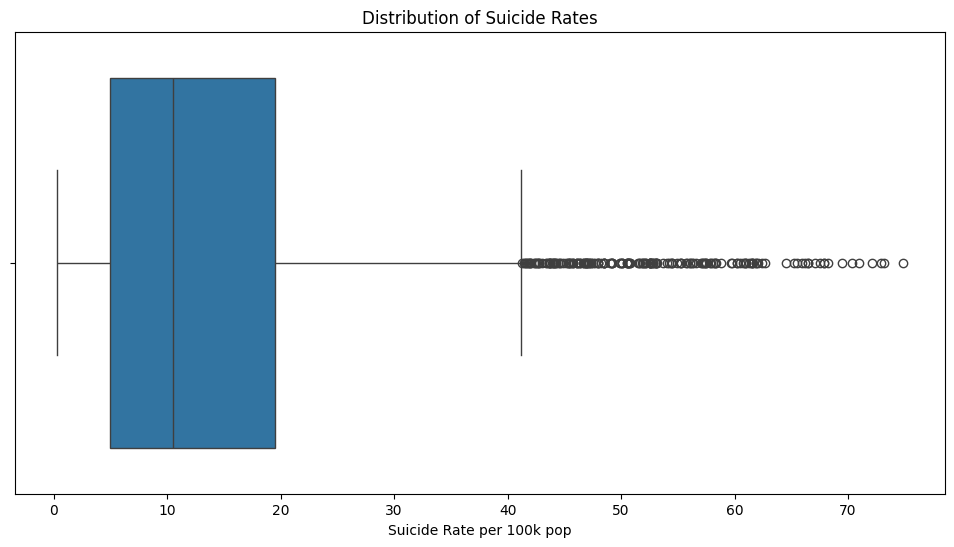

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df2, x="ESTIMATE")
plt.xlabel("Suicide Rate per 100k pop")
plt.title("Distribution of Suicide Rates")
plt.show()
import numpy as np

print("\nAdditional Statistics:")
mode_val = df2['ESTIMATE'].mode()[0]  # mode can return multiple, take the first
range_val = df2['ESTIMATE'].max() - df2['ESTIMATE'].min()
variance_val = df2['ESTIMATE'].var()
std_dev_val = df2['ESTIMATE'].std()

print(f"Mode: {mode_val}")
print(f"Range: {range_val}")
print(f"Variance: {variance_val:.2f}")
print(f"Standard Deviation: {std_dev_val:.2f}")



In [7]:
import numpy as np

def print_stats(series, label):
    mean_val = series.mean()
    median_val = series.median()
    mode_val = series.mode().iloc[0] if not series.mode().empty else np.nan
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    min_val = series.min()
    max_val = series.max()
    range_val = max_val - min_val
    variance_val = series.var()
    std_dev_val = series.std()
    
    print(f"\nSuicide per 100k pop. descriptive statistics for {label}:")
    print(f"Mean: {mean_val:.2f}")
    print(f"Median (Q2): {median_val:.2f}")
    print(f"Mode: {mode_val:.2f}")
    print(f"Q1 (25th percentile): {q1:.2f}")
    print(f"Q3 (75th percentile): {q3:.2f}")
    print(f"Min: {min_val:.2f}")
    print(f"Max: {max_val:.2f}")
    print(f"Range: {range_val:.2f}")
    print(f"Variance: {variance_val:.2f}")
    print(f"Standard Deviation: {std_dev_val:.2f}")

print_stats(df2['ESTIMATE'], "all values")


Suicide per 100k pop. descriptive statistics for all values:
Mean: 13.71
Median (Q2): 10.50
Mode: 4.30
Q1 (25th percentile): 5.00
Q3 (75th percentile): 19.50
Min: 0.30
Max: 74.80
Range: 74.50
Variance: 132.98
Standard Deviation: 11.53
